<a href="https://colab.research.google.com/github/Shreyash-Padeer/AIL721-Proj/blob/main/EDA_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_csv('/content/retail_store_inventory.csv')
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunny                  0               66.16      Autumn  
2             Sunny                  1               31.32      Summer  
3            Cloudy                  1               34.74      Autumn  
4             Sunny                  0               68.95      Summer

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("/content/retail_store_inventory.csv")

print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())


(73100, 15)
Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount  

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [ ]:
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  Year  \
0             Rainy                  0               29.69      Autumn  2022   
1             Sunny                  0               66.16      Autumn  2022   
2             Sunny                  1               31.32      Summer  2022   
3            Cloudy                  1               34.74      Autumn  2022   
4             Sunny                  0               68.95      Summer  2022   

   Month  Weekday  Is_Weekend  
0      1        5           1  
1      1        5           1  
2      1        5           1  
3      1        5           1  
4      1        5           1

In [ ]:
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 Series([], dtype: int64)


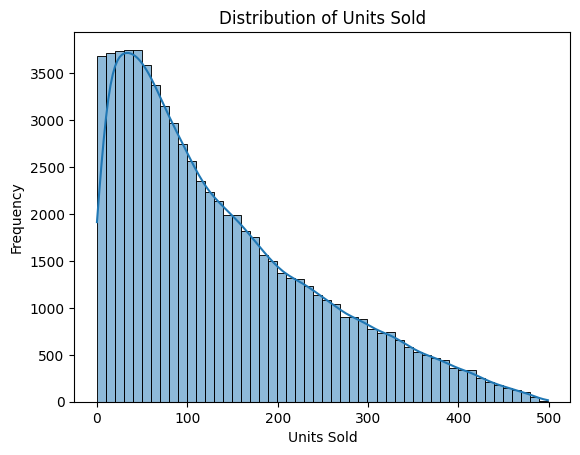

In [ ]:
sns.histplot(df['Units Sold'], bins=50, kde=True)
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()


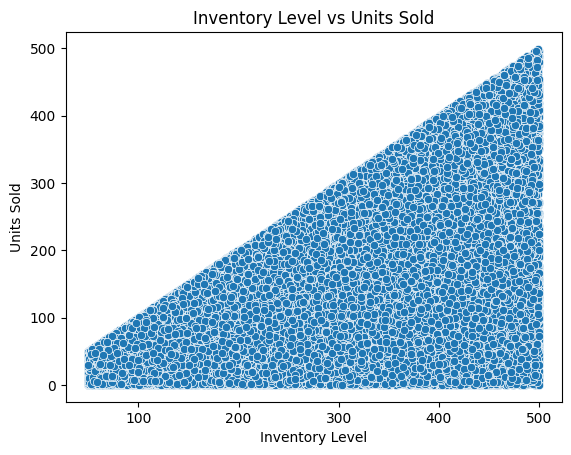

In [ ]:
sns.scatterplot(x='Inventory Level', y='Units Sold', data=df)
plt.title("Inventory Level vs Units Sold")
plt.show()


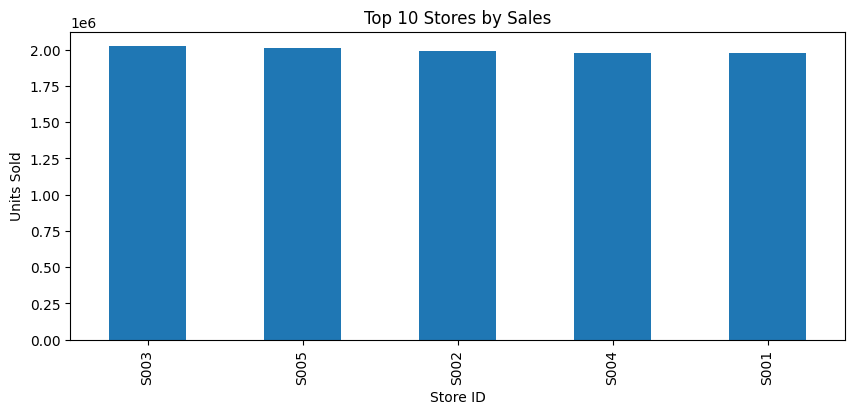

In [ ]:
store_sales = df.groupby('Store ID')['Units Sold'].sum().sort_values(ascending=False).head(10)
store_sales.plot(kind='bar', title='Top 10 Stores by Sales', figsize=(10, 4))
plt.ylabel("Units Sold")
plt.show()


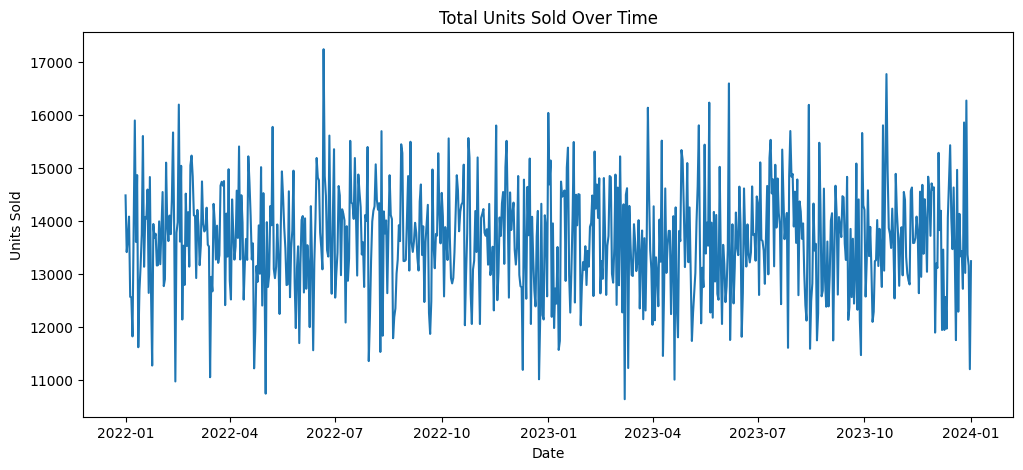

In [ ]:
daily_sales = df.groupby('Date')['Units Sold'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='Units Sold', data=daily_sales)
plt.title("Total Units Sold Over Time")
plt.ylabel("Units Sold")
plt.show()


# Storewise Time Series Plot

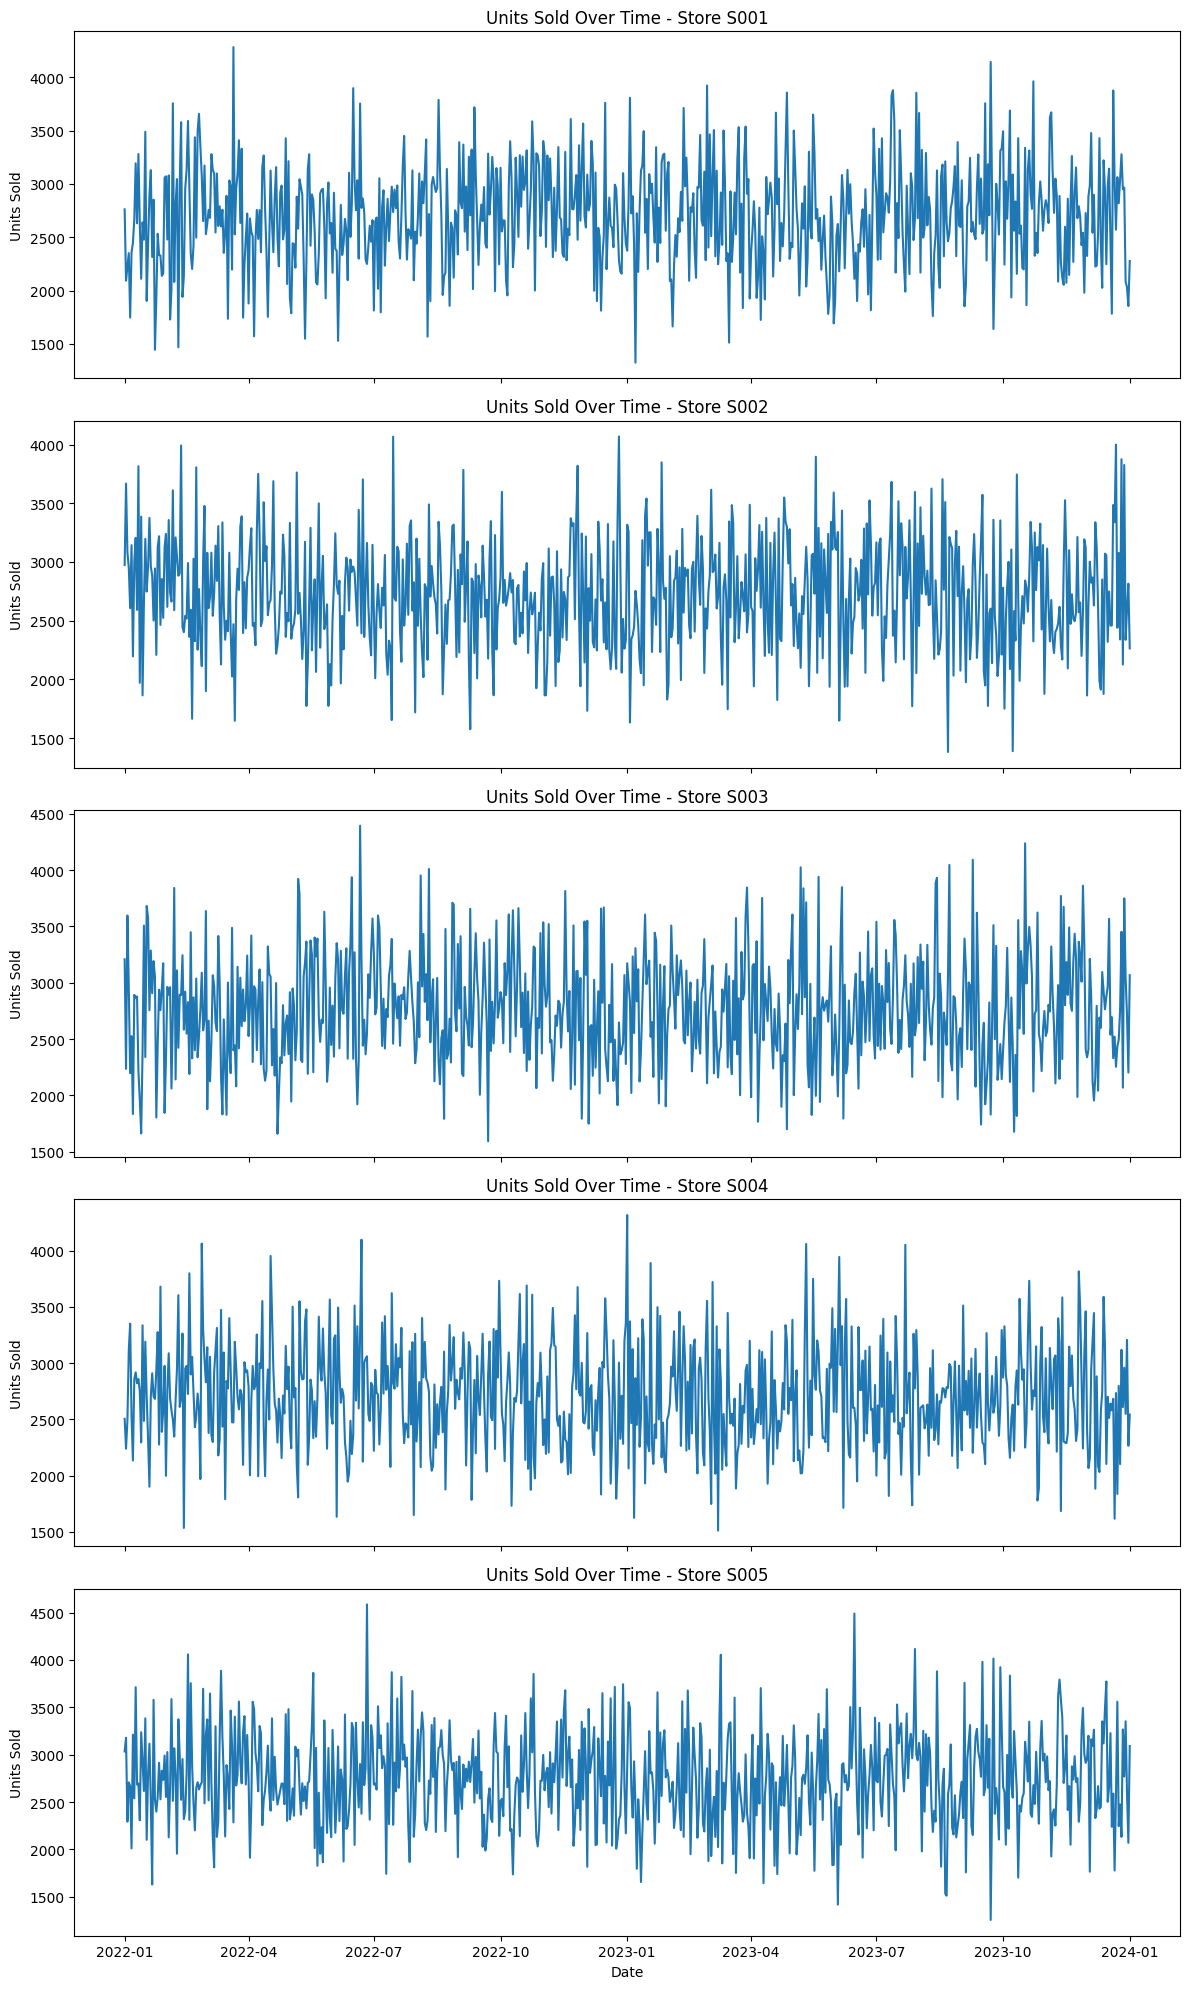

In [ ]:
import matplotlib.pyplot as plt

store_ids = df['Store ID'].unique()

n_stores = len(store_ids)
fig, axes = plt.subplots(n_stores, 1, figsize=(12, 4 * n_stores), sharex=True)

for i, store_id in enumerate(store_ids):
    store_data = df[df['Store ID'] == store_id].groupby('Date')['Units Sold'].sum().reset_index()
    axes[i].plot(store_data['Date'], store_data['Units Sold'])
    axes[i].set_title(f"Units Sold Over Time - Store {store_id}")
    axes[i].set_ylabel("Units Sold")

plt.xlabel("Date")
plt.tight_layout()
plt.show()


Time series plot for One Year

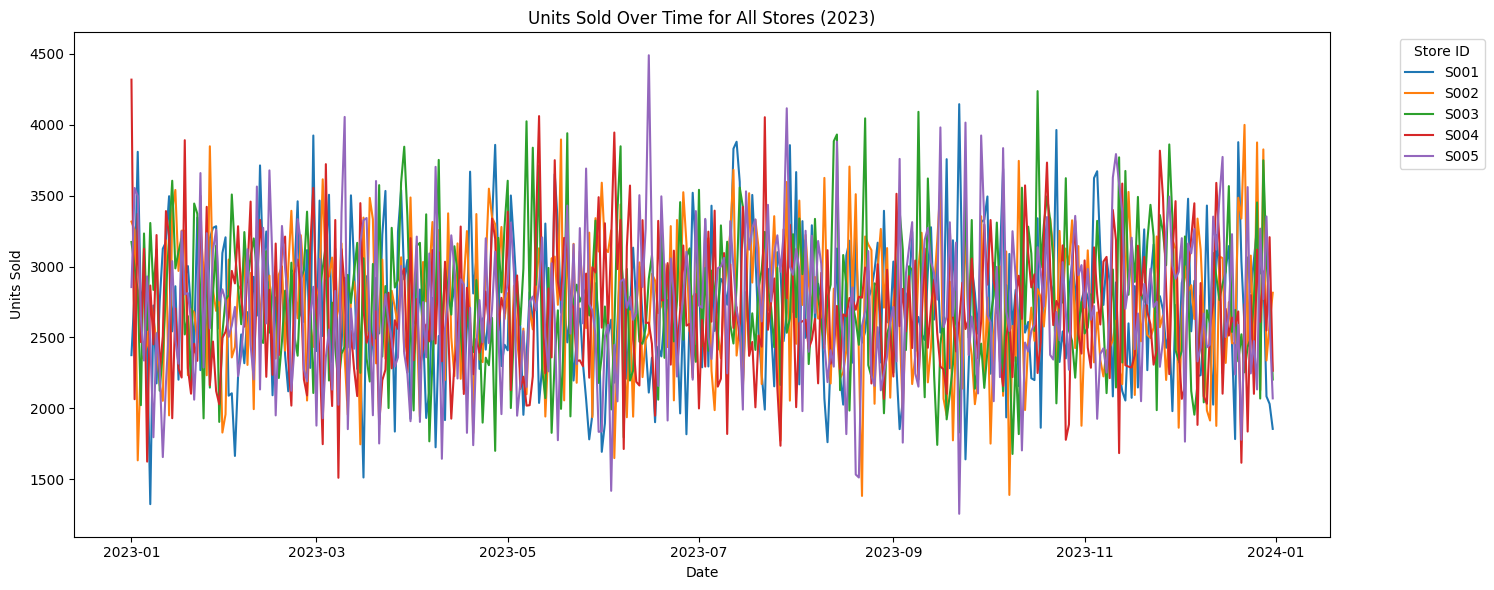

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

df_2023 = df[df['Year'] == 2023]

store_sales_2023 = df_2023.groupby(['Store ID', 'Date'])['Units Sold'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=store_sales_2023, x='Date', y='Units Sold', hue='Store ID', palette='tab10')
plt.title("Units Sold Over Time for All Stores (2023)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend(title="Store ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


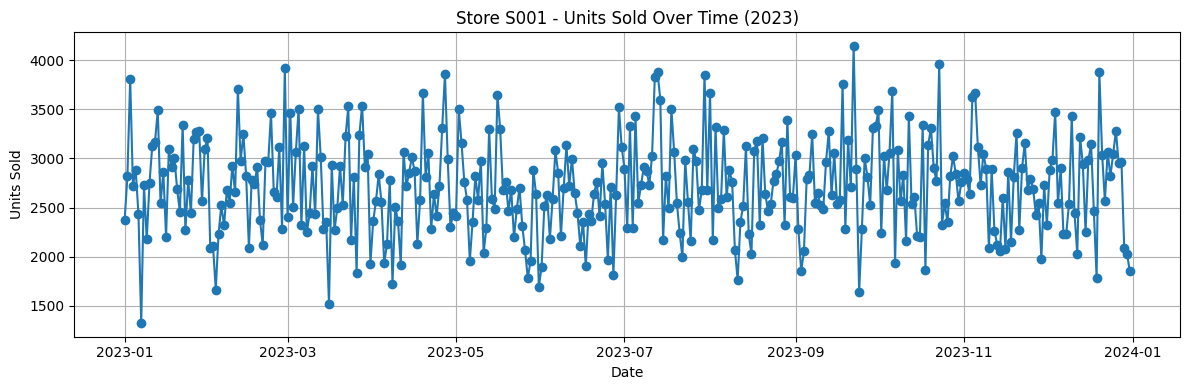

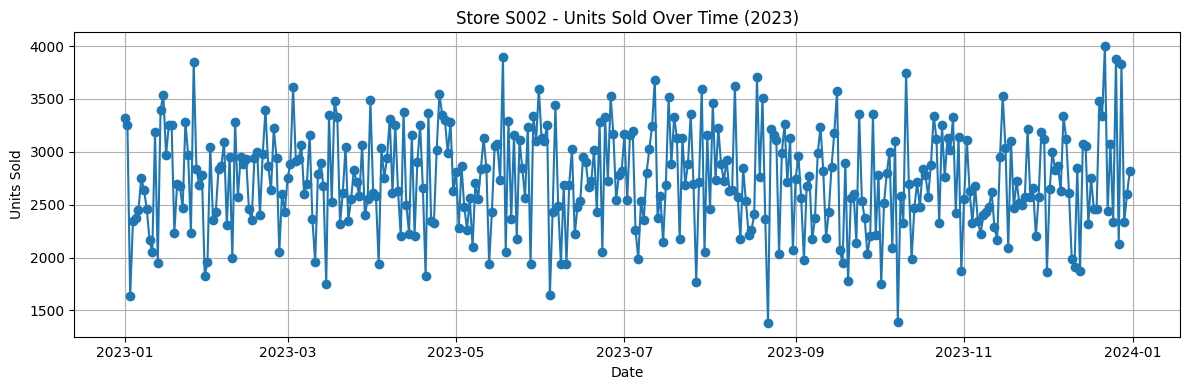

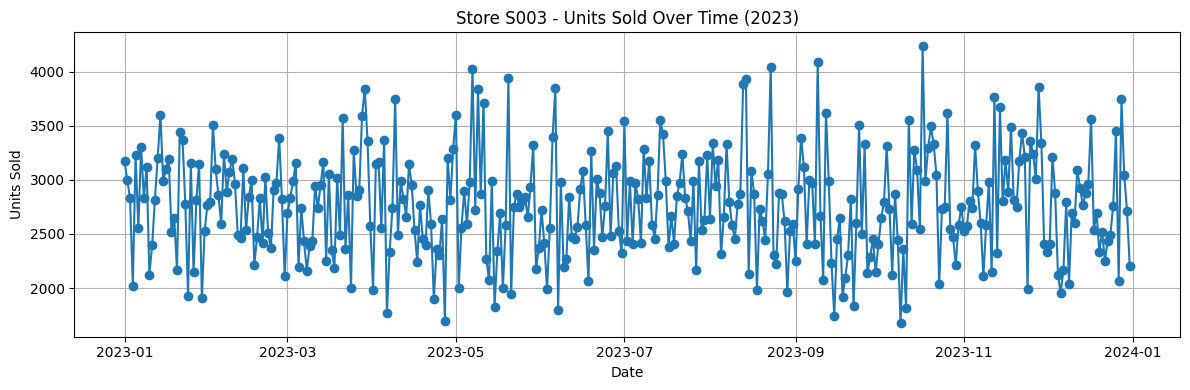

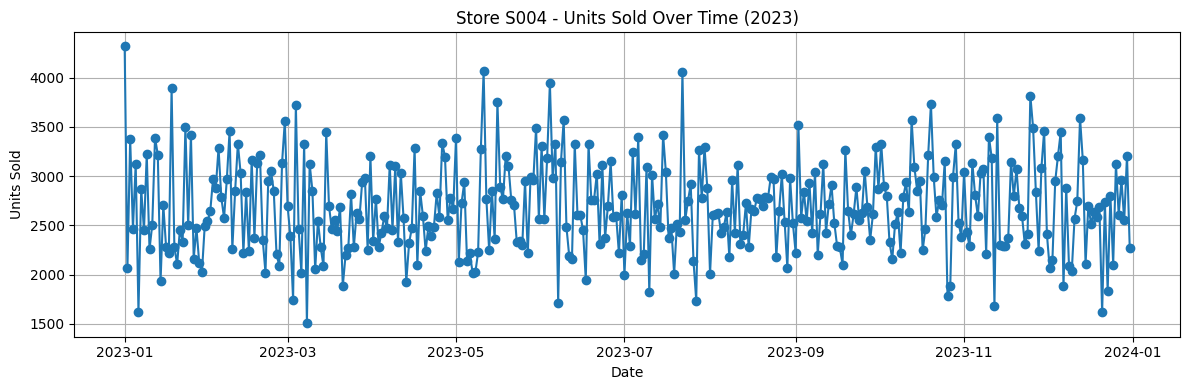

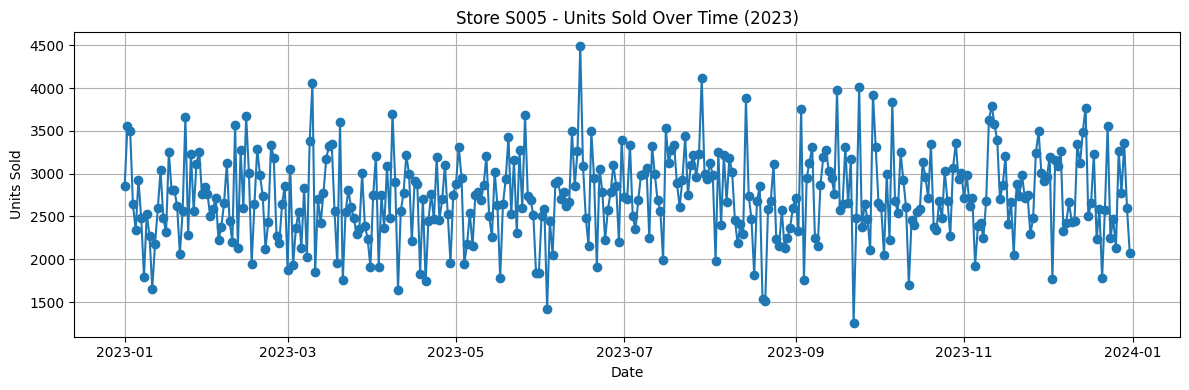

In [ ]:
unique_stores = store_sales_2023['Store ID'].unique()

for store_id in unique_stores:
    store_data = store_sales_2023[store_sales_2023['Store ID'] == store_id]

    plt.figure(figsize=(12, 4))
    plt.plot(store_data['Date'], store_data['Units Sold'], marker='o', linestyle='-')
    plt.title(f"Store {store_id} - Units Sold Over Time (2023)")
    plt.xlabel("Date")
    plt.ylabel("Units Sold")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


For One Month

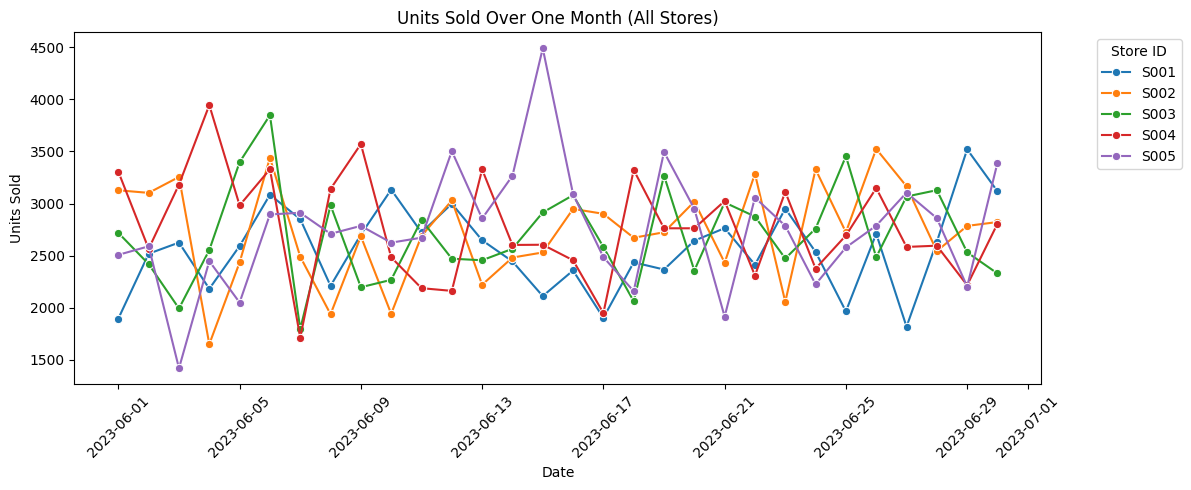

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])

start_date = '2023-06-01'
end_date = '2023-06-30'
df_month = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

month_sales = df_month.groupby(['Store ID', 'Date'])['Units Sold'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=month_sales, x='Date', y='Units Sold', hue='Store ID', marker='o')
plt.title("Units Sold Over One Month (All Stores)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend(title="Store ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


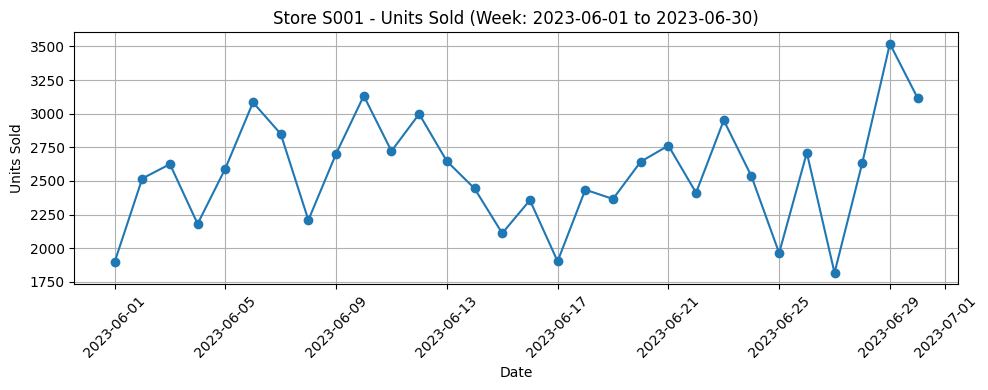

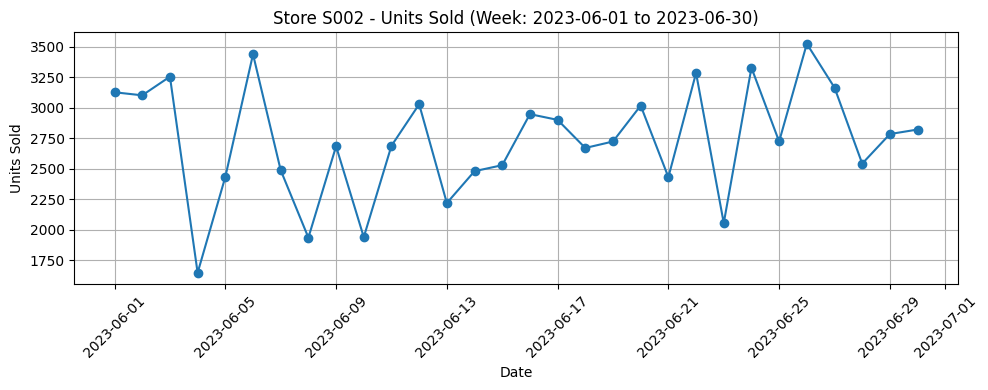

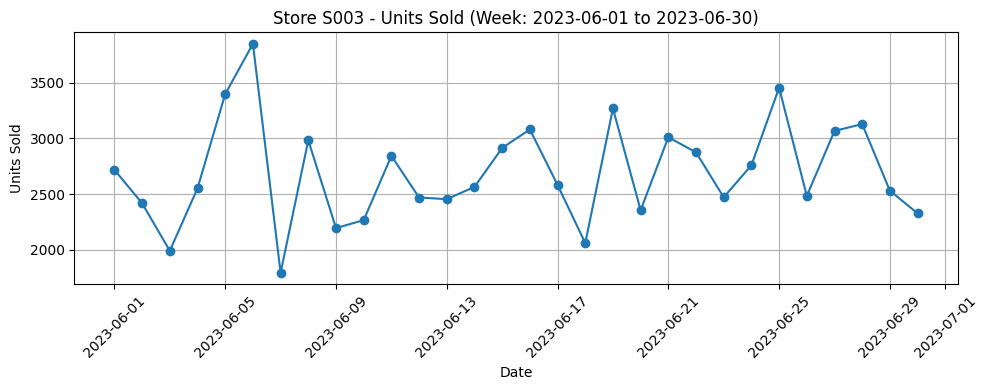

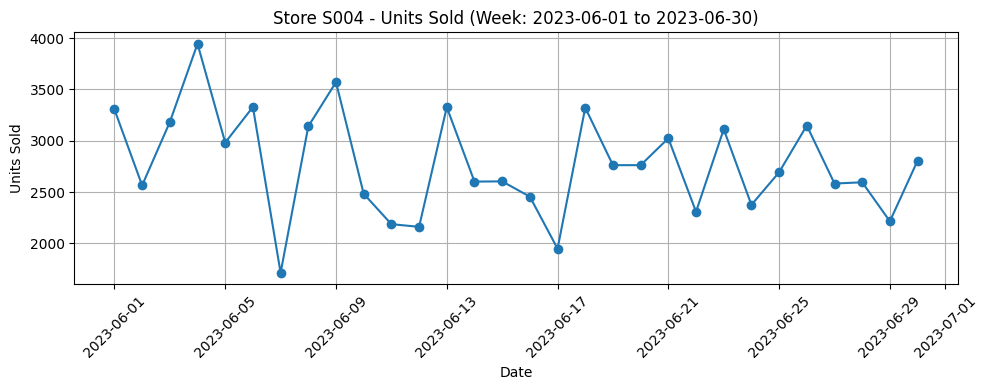

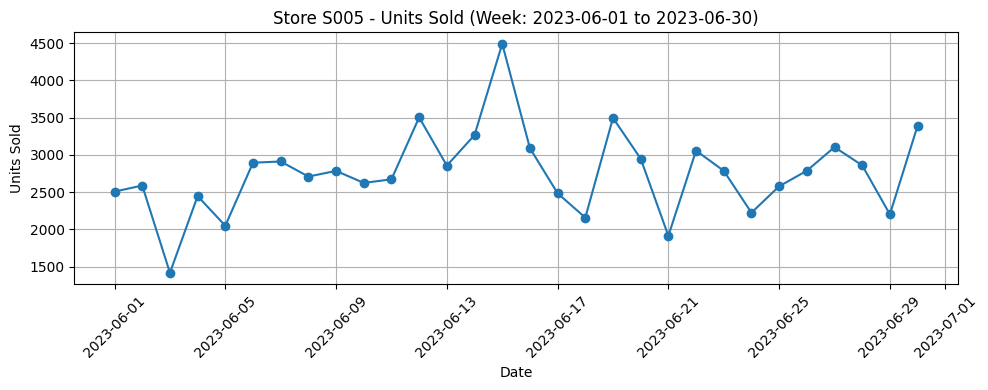

In [ ]:
unique_stores = month_sales['Store ID'].unique()

for store_id in unique_stores:
    store_data = month_sales[month_sales['Store ID'] == store_id]

    plt.figure(figsize=(10, 4))
    plt.plot(store_data['Date'], store_data['Units Sold'], marker='o', linestyle='-')
    plt.title(f"Store {store_id} - Units Sold (Week: {start_date} to {end_date})")
    plt.xlabel("Date")
    plt.ylabel("Units Sold")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


For One Week

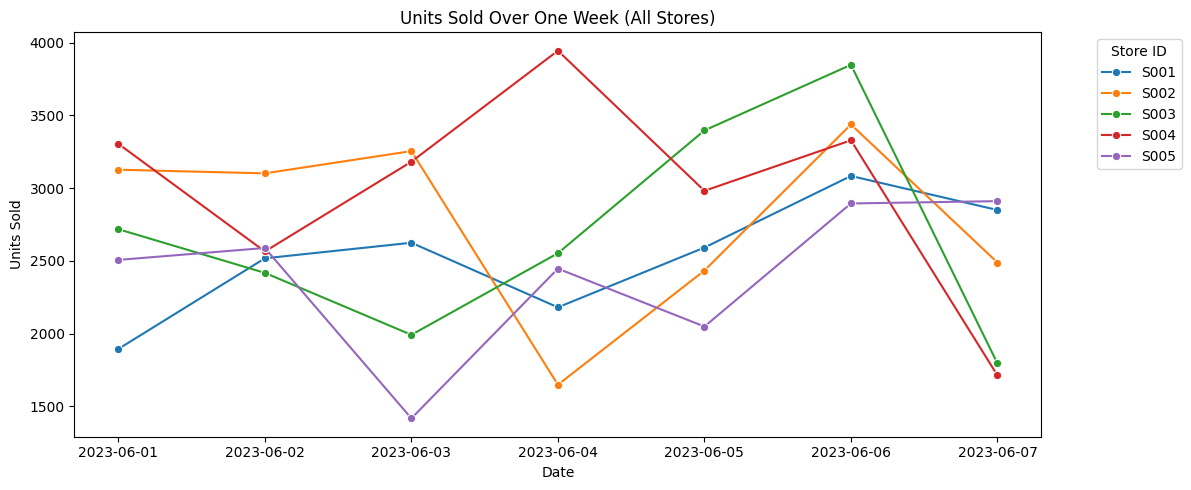

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])

start_date = '2023-06-01'
end_date = '2023-06-07'
df_week = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

week_sales = df_week.groupby(['Store ID', 'Date'])['Units Sold'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=week_sales, x='Date', y='Units Sold', hue='Store ID', marker='o')
plt.title("Units Sold Over One Week (All Stores)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend(title="Store ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


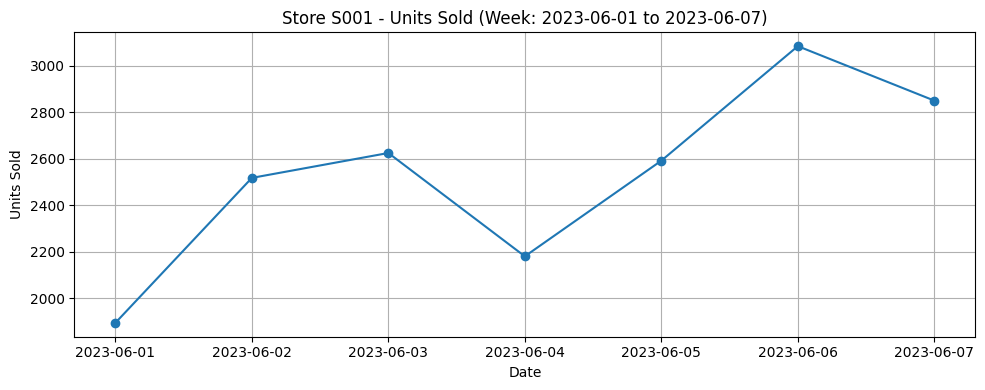

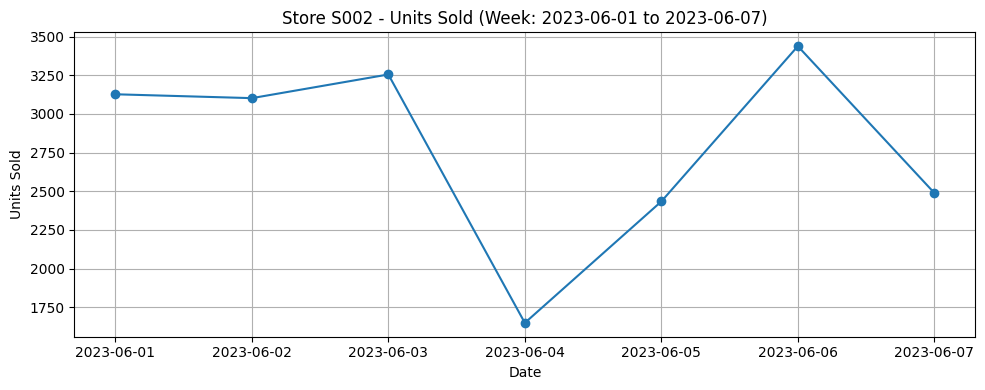

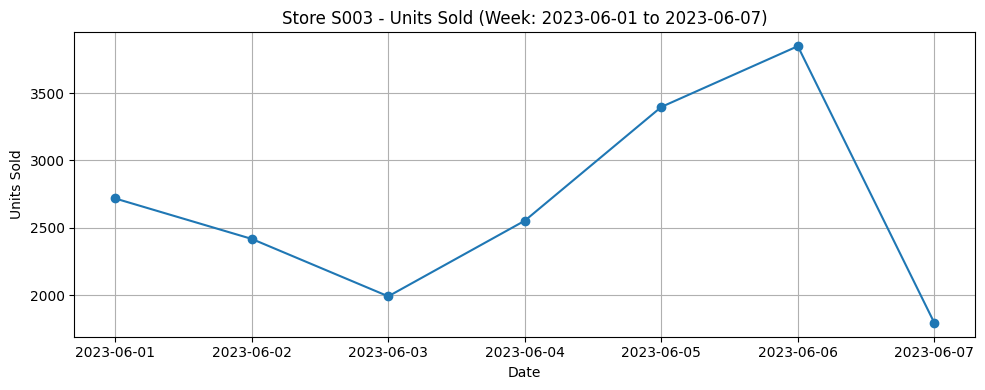

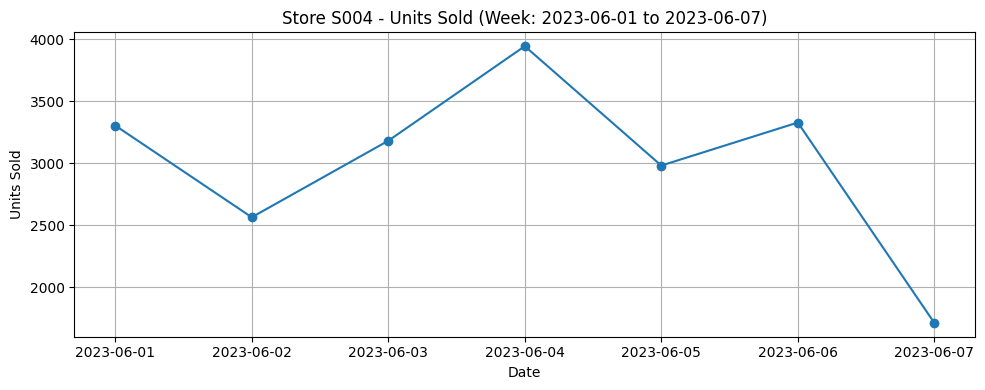

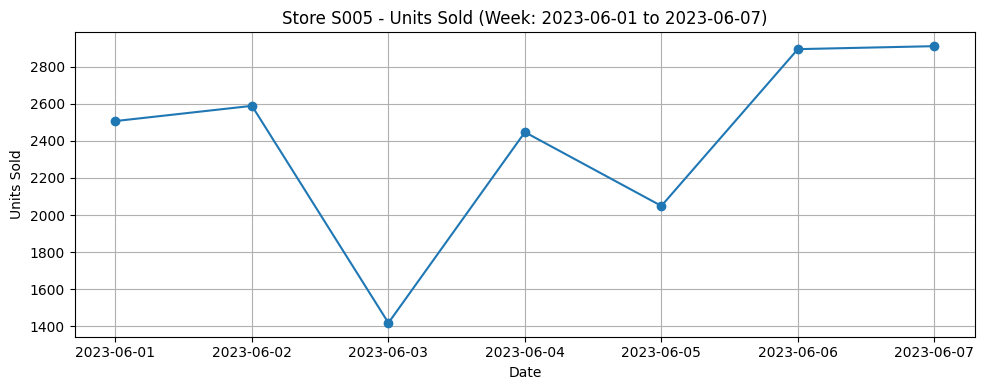

In [ ]:
unique_stores = week_sales['Store ID'].unique()

for store_id in unique_stores:
    store_data = week_sales[week_sales['Store ID'] == store_id]

    plt.figure(figsize=(10, 4))
    plt.plot(store_data['Date'], store_data['Units Sold'], marker='o', linestyle='-')
    plt.title(f"Store {store_id} - Units Sold (Week: {start_date} to {end_date})")
    plt.xlabel("Date")
    plt.ylabel("Units Sold")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


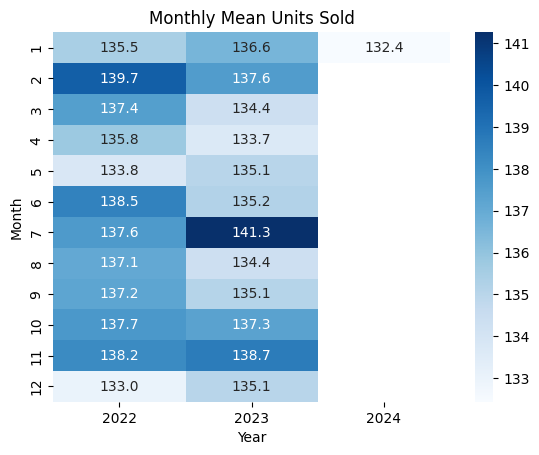

In [ ]:
pivot = df.pivot_table(values='Units Sold', index='Month', columns='Year', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='Blues')
plt.title("Monthly Mean Units Sold")
plt.show()


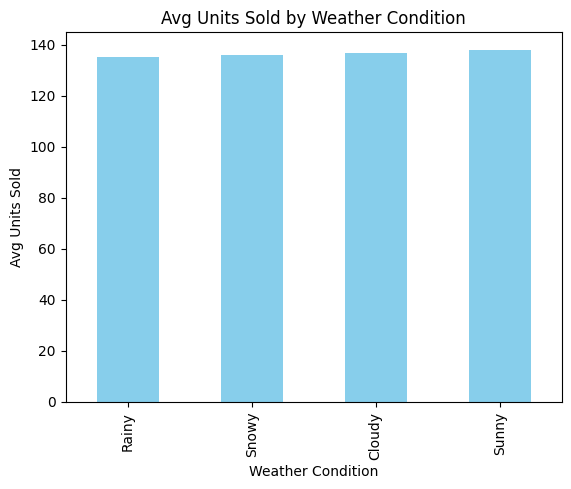

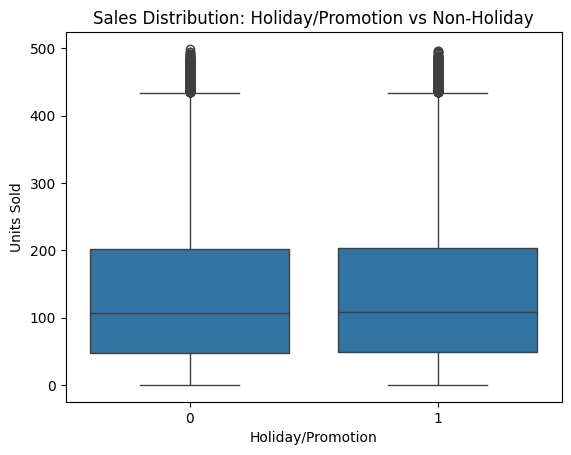

In [ ]:
weather_sales = df.groupby('Weather Condition')['Units Sold'].mean().sort_values()
weather_sales.plot(kind='bar', title="Avg Units Sold by Weather Condition", color='skyblue')
plt.ylabel("Avg Units Sold")
plt.show()

sns.boxplot(x='Holiday/Promotion', y='Units Sold', data=df)
plt.title("Sales Distribution: Holiday/Promotion vs Non-Holiday")
plt.show()


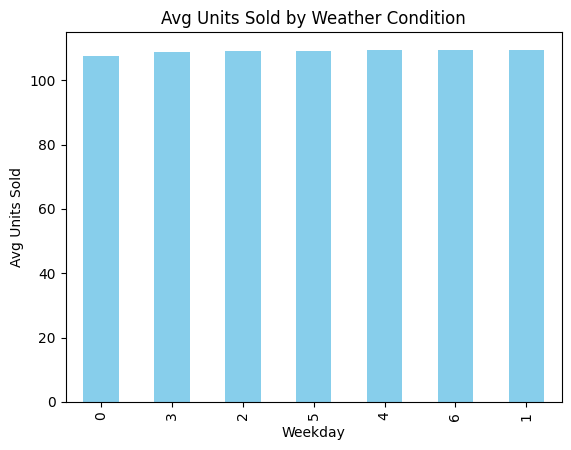

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
dow_sales = df.groupby('Weekday')['Units Sold'].std().sort_values()
dow_sales.plot(kind='bar', title="Avg Units Sold by Weather Condition", color='skyblue')
plt.ylabel("Avg Units Sold")
plt.show()


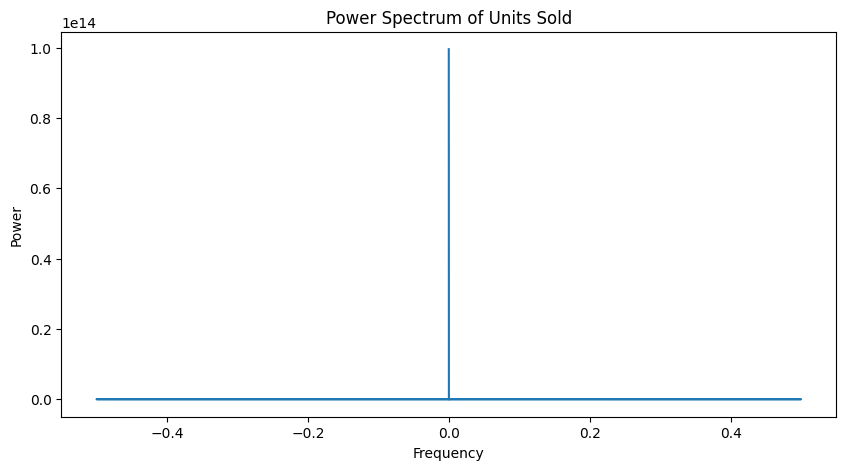

In [ ]:
import numpy as np

daily_units_sold = df['Units Sold']
fft_values = np.fft.fft(daily_units_sold)
frequencies = np.fft.fftfreq(len(daily_units_sold), d=1)

plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.abs(fft_values)**2)
plt.title("Power Spectrum of Units Sold")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()


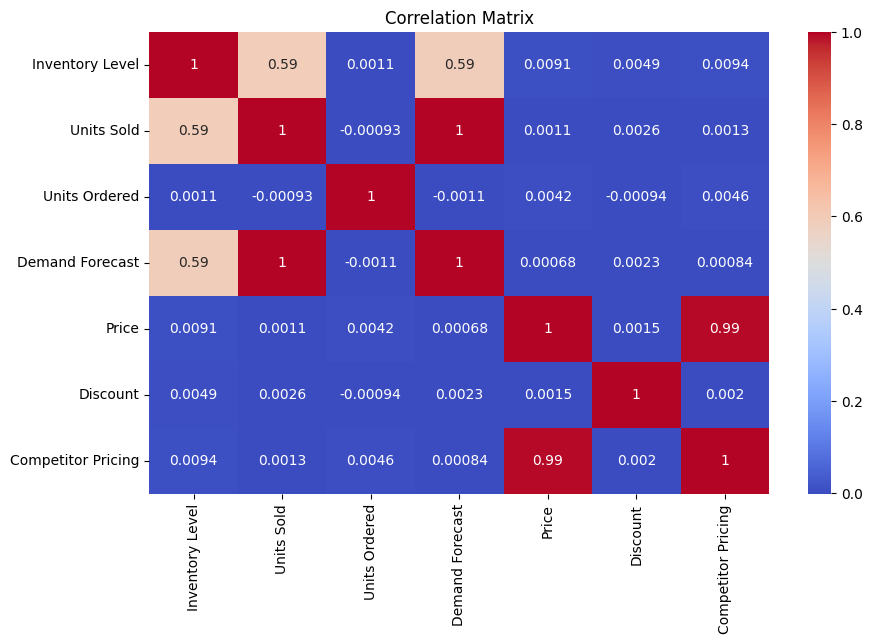

In [ ]:
num_cols = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing']
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
fig = px.line(daily_sales, x='Date', y='Units Sold', title='Interactive Time Series of Daily Units Sold')
fig.show()


In [ ]:
store_sales_2023 = df_2023.groupby(['Date'])['Units Sold'].sum().reset_index()
fig = px.line(store_sales_2023, x='Date', y='Units Sold', title='Interactive Time Series of Daily Units Sold (For One Year)')
fig.show()

In [ ]:
start_date = '2023-06-01'
end_date = '2023-06-30'
df_month = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

month_sales = df_month.groupby(['Date'])['Units Sold'].sum().reset_index()
fig = px.line(month_sales, x='Date', y='Units Sold', title='Interactive Time Series of Daily Units Sold (For One Month)')
fig.show()

In [ ]:
start_date = '2023-06-01'
end_date = '2023-06-07'
df_month = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

month_sales = df_month.groupby(['Date'])['Units Sold'].sum().reset_index()
fig = px.line(month_sales, x='Date', y='Units Sold', title='Interactive Time Series of Daily Units Sold (For One Week)')
fig.show()

# Plot for Storewise and Productwise time series data

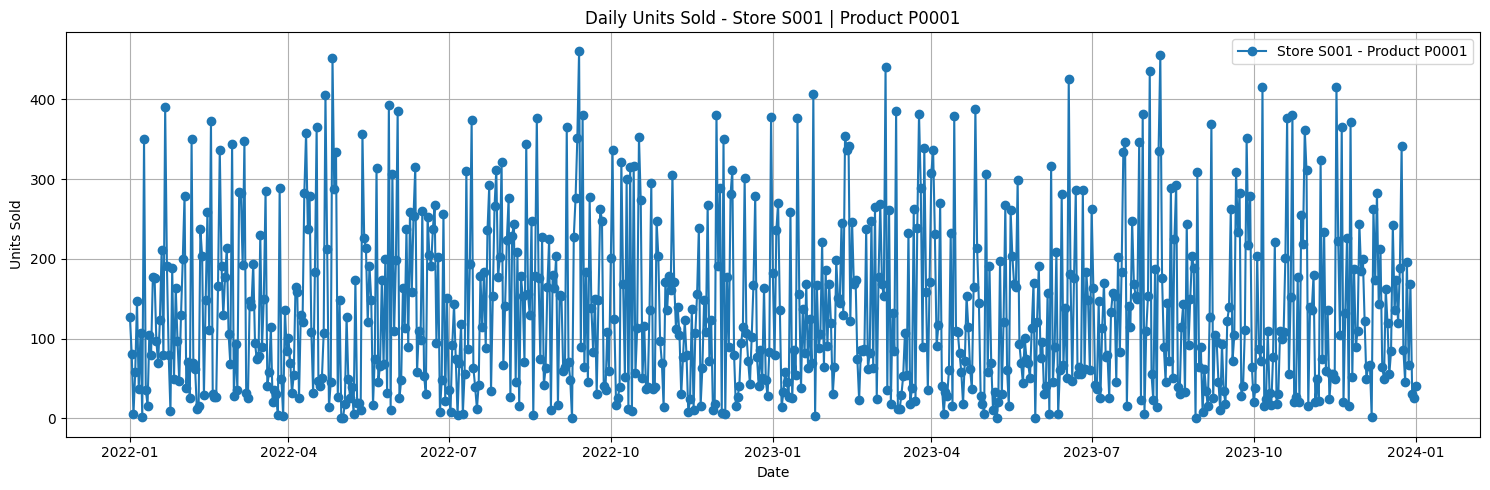

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/retail_store_inventory.csv")

df['Date'] = pd.to_datetime(df['Date'])

df = df.dropna(subset=['Units Sold'])

store_id = 'S001'
product_id = 'P0001'

filtered_df = df[(df['Store ID'] == store_id) & (df['Product ID'] == product_id)]
daily_df = filtered_df.groupby('Date')['Units Sold'].sum().to_frame()


daily_df = daily_df.asfreq('D')

daily_df['Units Sold'] = daily_df['Units Sold'].interpolate(method='linear')

plt.figure(figsize=(15, 5))
plt.plot(daily_df.index, daily_df['Units Sold'], marker='o', label=f'Store {store_id} - Product {product_id}')
plt.title(f'Daily Units Sold - Store {store_id} | Product {product_id}')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Time Decomposition Analysis

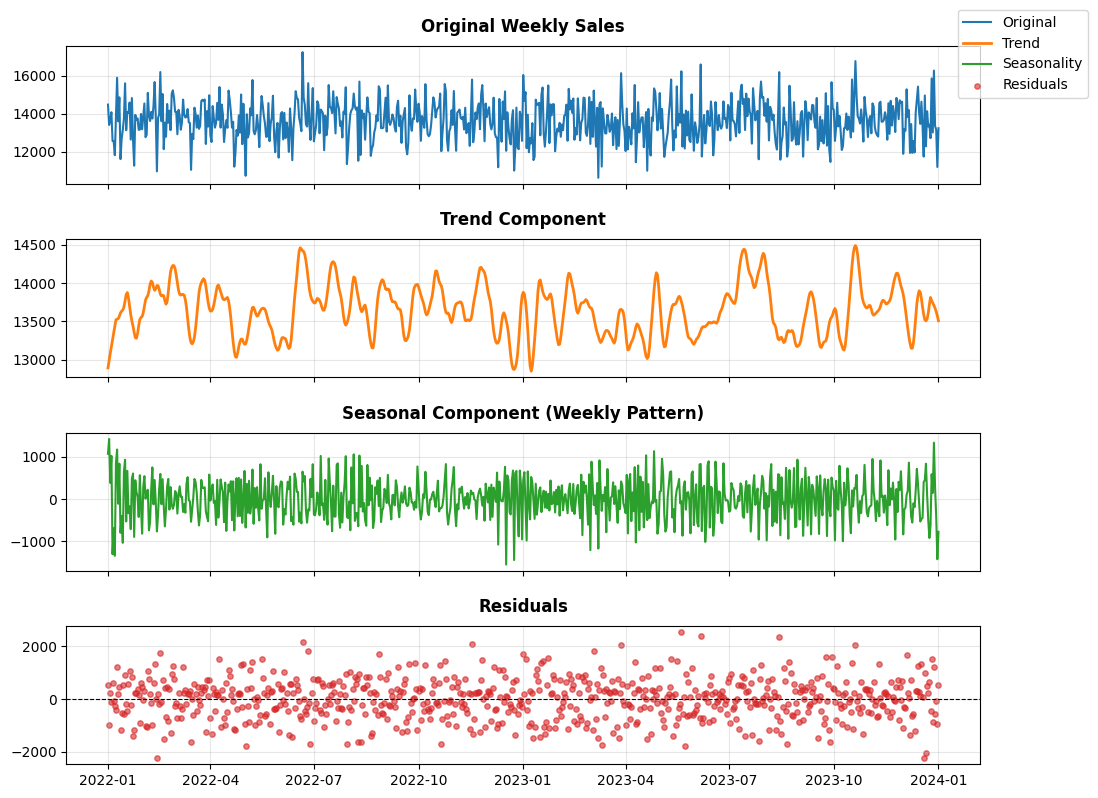

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

colors = {
    'original': '#1f77b4',  # Blue
    'trend': '#ff7f0e',     # Orange
    'seasonal': '#2ca02c',  # Green
    'resid': '#d62728'      # Red
}

daily_sales = df.groupby('Date')['Units Sold'].sum().asfreq('D').ffill()

stl = STL(daily_sales, period=7)
stl_result = stl.fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

ax1.plot(stl_result.observed, color=colors['original'], linewidth=1.5)
ax1.set_title('Original Weekly Sales', fontsize=12, pad=10, fontweight='bold')
ax1.grid(alpha=0.3)

ax2.plot(stl_result.trend, color=colors['trend'], linewidth=2)
ax2.set_title('Trend Component', fontsize=12, pad=10, fontweight='bold')
ax2.grid(alpha=0.3)

ax3.plot(stl_result.seasonal, color=colors['seasonal'], linewidth=1.5)
ax3.set_title('Seasonal Component (Weekly Pattern)', fontsize=12, pad=10, fontweight='bold')
ax3.grid(alpha=0.3)

ax4.scatter(stl_result.resid.index,
            stl_result.resid,
            color=colors['resid'],
            s=15,
            alpha=0.6)
ax4.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax4.set_title('Residuals', fontsize=12, pad=10, fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

fig.legend(['Original', 'Trend', 'Seasonality', 'Residuals'],
           loc='upper right',
           bbox_to_anchor=(1.1, 1),
           frameon=True)

plt.show()